In [98]:
# Importing Libraries

import nltk
import string
import pickle
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.style as stl
import matplotlib.pyplot as plt
from nltk import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix


In [2]:
# Importing dataset
df = pd.read_csv("sms-spam.csv")
print("Shape --> ", df.shape)

Shape -->  (5572, 5)


### Data Cleaning

In [3]:
# Checking for null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
# Deleting unwanted columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# Renaming the columns 
df.rename(columns={'v1':'result', 'v2':'input'}, inplace=True)
df

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# Again checking for null values
df.isnull().sum()

result    0
input     0
dtype: int64

In [9]:
# counting frquencies of values
df['result'].value_counts()

result
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
# checking for duplicate values
df.duplicated().sum()  # 403 dupicate values

np.int64(403)

In [11]:
# Deleting duplicate values

df = df.drop_duplicates()
print(df.duplicated().sum()) 

0


In [12]:
df.shape

(5169, 2)

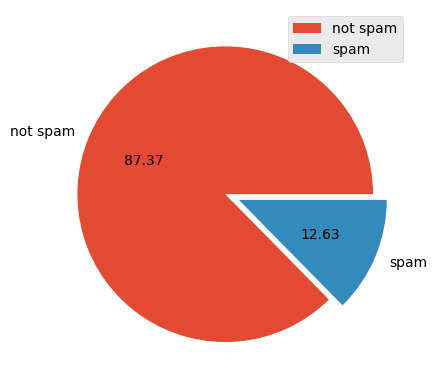

In [13]:
# Data visualization
stl.use('ggplot')
explode = [0, 0.1]
plt.pie(df['result'].value_counts(), labels=['not spam', 'spam'], autopct='%0.2f', explode=explode)
plt.legend()
plt.show()

In [14]:
# handling warnings

warnings.filterwarnings("ignore")

In [15]:
# handling catagoricla data
label_encoder = LabelEncoder()
df['result'] = label_encoder.fit_transform(df['result'])
df

# 0 -> hams
# 1 -> spams

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
# Creating a new column with count of characters
df['countCharacters'] = df['input'].apply(len)

# Creating a new column with count of words
df['countWords'] = df['input'].apply(lambda x: len(nltk.word_tokenize(x)))

# Creating a new column with count of sentence
df['countSentence'] = df['input'].apply(lambda x: len(nltk.sent_tokenize(x)))

df.head()

,result,input,countCharacters,countWords,countSentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
# extracting info for hams only
df[df['result']==0][['countWords', 'countSentence', 'countSentence']].describe()

,countWords,countSentence,countSentence
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,1.820195
std,13.493970,1.383657,1.383657
min,1.000000,1.000000,1.000000
25%,8.000000,1.000000,1.000000
50%,13.000000,1.000000,1.000000
75%,22.000000,2.000000,2.000000
max,220.000000,38.000000,38.000000


In [18]:
# extracting info for spam sms 
df[df['result']==1][['countWords', 'countSentence', 'countSentence']].describe()

,countWords,countSentence,countSentence
count,653.000000,653.000000,653.000000
mean,27.667688,2.970904,2.970904
std,7.008418,1.488425,1.488425
min,2.000000,1.000000,1.000000
25%,25.000000,2.000000,2.000000
50%,29.000000,3.000000,3.000000
75%,32.000000,4.000000,4.000000
max,46.000000,9.000000,9.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

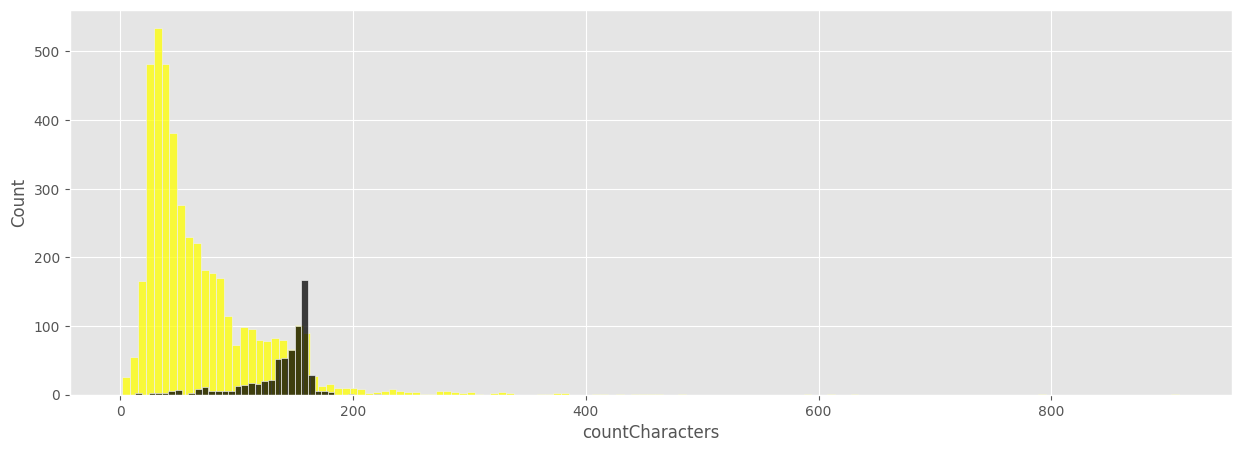

In [19]:
# for better visualization, we will plot a histogram using 'seaborn'
plt.figure(figsize=(15,5))
sns.histplot(df[df['result']== 0]['countCharacters'], color = 'yellow')
sns.histplot(df[df['result']== 1]['countCharacters'], color = 'black')

# black --> spam, yellow --> ham (not spam)

<Axes: xlabel='countWords', ylabel='Count'>

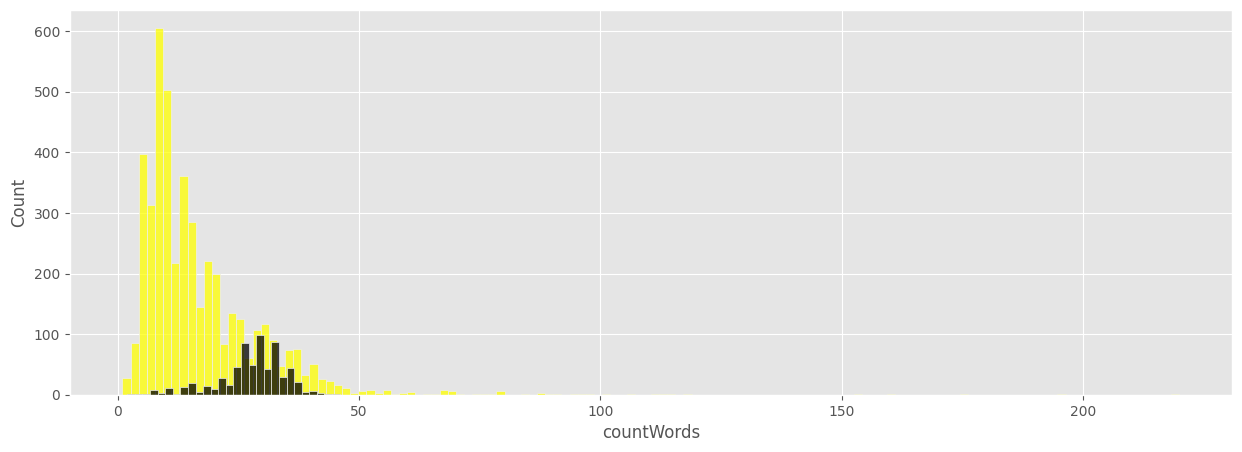

In [20]:
plt.figure(figsize=(15,5))
sns.histplot(df[df['result']==0]['countWords'], color = 'yellow')
sns.histplot(df[df['result']==1]['countWords'], color = 'black')

# black --> spam, yellow --> ham (not spam)

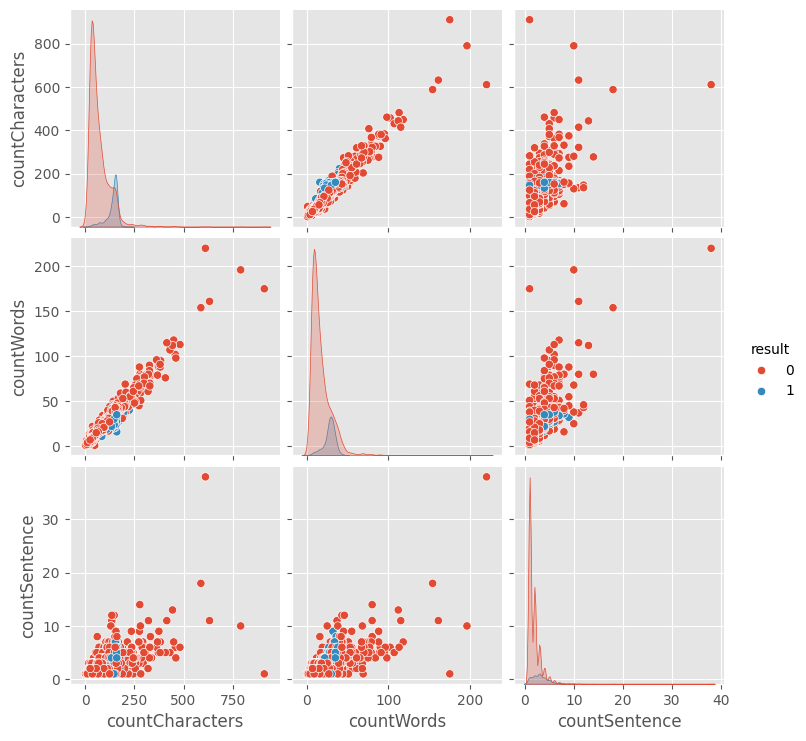

In [21]:
# finding relationship between the columns
sns.pairplot(df, hue='result')

In [48]:
# transform texts 

# stopwords.words('English') is a function of 'nltk', returns list of stop words in English lang
stop_words = stopwords.words('English')

def transform_text(text: str) -> str:
    "transfrom texts into lower and split into words"

    # converting to lower case
    text = text.lower()

    # tokenization
    text = nltk.word_tokenize(text)

    # removing special characters 
    SC_removed = []
    for i in text:
        if i.isalnum():
            SC_removed.append(i)
    
    # updating the text after removed special characters
    text = SC_removed[:]

    # rmoving stopwords and punctuations
    SWP_removed = []
    for word in text:
        # string.punctuation is a part of 'string' module, containing the ASCII punctuation
        if word not in stop_words and word not in string.punctuation:
            SWP_removed.append(word)

    # stemming the data using 'PorterStemmer (a class in nltk)' algorithm,
    ps = PorterStemmer()           # removing suffix like ing
    stemmed = list() 
    for i in text:
        stemmed.append(ps.stem(i))

    text = stemmed[:]
    return " ".join(text)

In [49]:
# Create a new column to store the transformed text -> 'processed'
df['processed'] = df['input'].apply(transform_text)
df.head()

,result,input,countCharacters,countWords,countSentence,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [50]:
# creating word cloud for data visualization to is display the most frequently occuring words in the processed dataset using 'WordCloud' class
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')

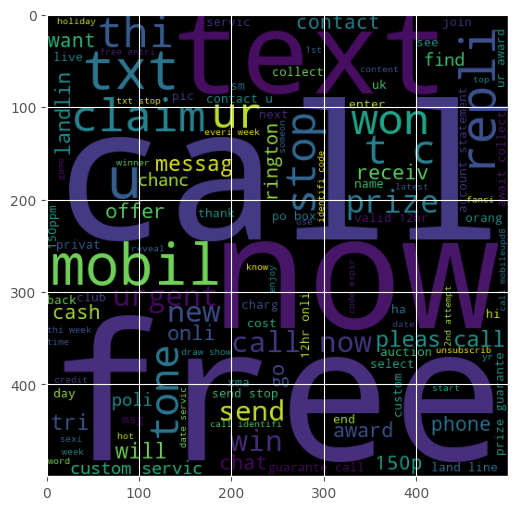

In [51]:
# creating wordcloud for spam messages
spamWC = wc.generate(df[df['result'] == 1]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

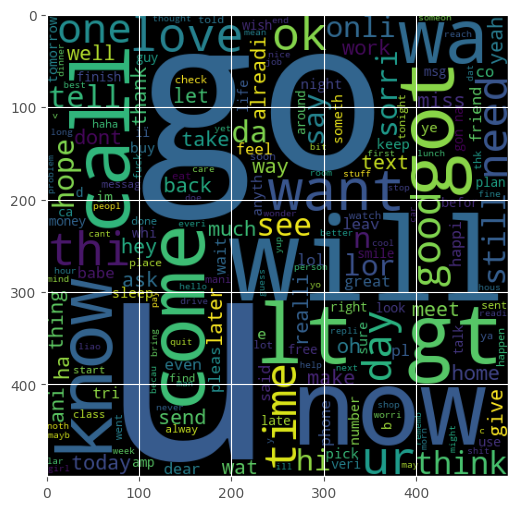

In [52]:
# creating a wordcloud for the ham messages
spamWC = wc.generate(df[df['result'] == 0]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

In [60]:
# extract all the words used in Spam messages
spamWords = []

for msg in df[df['result'] == 1]['processed'].tolist():
    for word in msg.split():
        spamWords.append(word)

spamWords

['free',
 'entri',
 'in',
 '2',
 'a',
 'wkli',
 'comp',
 'to',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 'to',
 '87121',
 'to',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'there',
 'darl',
 'it',
 'been',
 '3',
 'week',
 'now',
 'and',
 'no',
 'word',
 'back',
 'i',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'to',
 'send',
 'to',
 'rcv',
 'winner',
 'as',
 'a',
 'valu',
 'network',
 'custom',
 'you',
 'have',
 'been',
 'select',
 'to',
 'receivea',
 'prize',
 'reward',
 'to',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'onli',
 'had',
 'your',
 'mobil',
 '11',
 'month',
 'or',
 'more',
 'u',
 'r',
 'entitl',
 'to',
 'updat',
 'to',
 'the',
 'latest',
 'colour',
 'mobil',
 'with',
 'camera',
 'for',
 'free',
 'call',
 'the',
 'mobil',
 'updat',
 'co',
 'free',
 'on',
 '08002986030',


In [61]:
# count the frequency of ths words in spam messages

spamWordsDict = Counter(spamWords)

# extract most common words
spamWordsDict.most_common(40)

[('to', 595),
 ('a', 330),
 ('call', 320),
 ('you', 267),
 ('your', 252),
 ('free', 191),
 ('for', 183),
 ('the', 183),
 ('now', 164),
 ('or', 157),
 ('2', 155),
 ('is', 144),
 ('txt', 141),
 ('text', 122),
 ('from', 122),
 ('on', 121),
 ('u', 119),
 ('ur', 119),
 ('have', 116),
 ('mobil', 114),
 ('and', 104),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('with', 94),
 ('prize', 82),
 ('thi', 82),
 ('of', 81),
 ('our', 77),
 ('get', 74),
 ('are', 69),
 ('just', 67),
 ('onli', 66),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('in', 62),
 ('send', 60),
 ('won', 59)]

In [62]:
# converting this dictionary to a dataframe
mostCommonSPAM = pd.DataFrame(spamWordsDict.most_common(40))

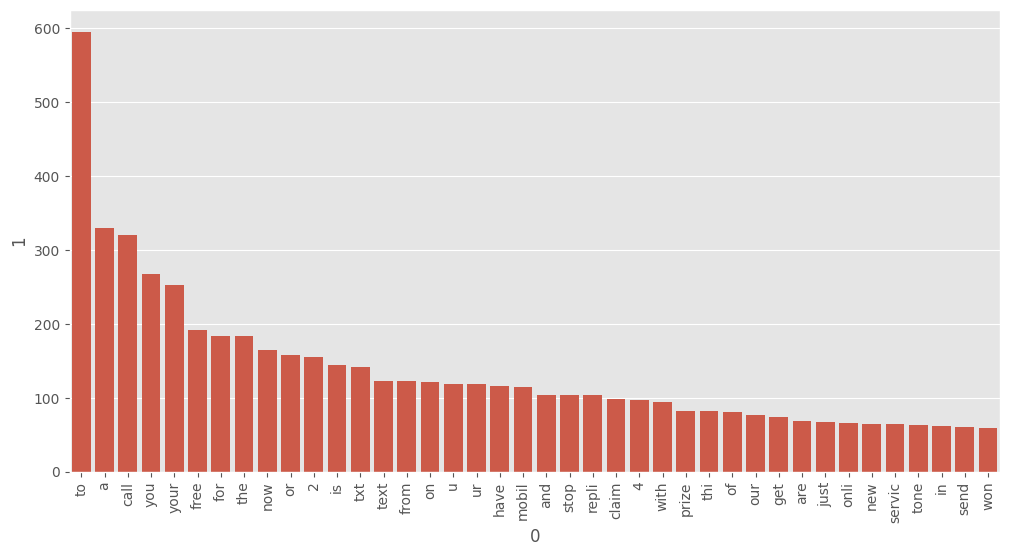

In [56]:

# plotting a bar plot of the mostCommonSPAM dataframe
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [63]:
#words like 'To', 'A', 'Class', 'YOU', 'YOUR', are the most common words in SPAM texts

### Model Building

In [67]:
# converting the collection of text into a a matrix of tokens
cv = CountVectorizer()

In [68]:
# transforming the data of processed column
X = cv.fit_transform(df['processed']).toarray()

#printing size of X
X.shape

(5169, 6796)

In [72]:
# storing the values of the 'result' column
Y = df['result'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
# Splitting the testing and training dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 49)

In [81]:
# creating the objects for the models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [87]:
# training the dataset for GaussianNB
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred1))
print(confusion_matrix(Y_test, Y_pred1))
print(precision_score(Y_test, Y_pred1))

0.867504835589942
[[781 118]
 [ 19 116]]
0.49572649572649574


In [88]:
# training the dataset for MultinomialnNB
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred2))
print(confusion_matrix(Y_test, Y_pred2))
print(precision_score(Y_test, Y_pred2))

0.9690522243713733
[[882  17]
 [ 15 120]]
0.8759124087591241


In [89]:
# training the dataset for BernoulliNB
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred3))
print(confusion_matrix(Y_test, Y_pred3))
print(precision_score(Y_test, Y_pred3))

0.9671179883945842
[[894   5]
 [ 29 106]]
0.954954954954955


In [92]:
# using 'TfidfVectorizer' for vectorization 
tf = TfidfVectorizer()

#transforming the data of processed column
X = tf.fit_transform(df['processed']).toarray()

#storing the values of the 'result' column
Y = df['result'].values

#splitting the training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 49)

In [93]:
# training the dataset for GaussianNB
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred1))
print(confusion_matrix(Y_test, Y_pred1))
print(precision_score(Y_test, Y_pred1))

0.8646034816247582
[[781 118]
 [ 22 113]]
0.48917748917748916


In [94]:
# training the dataset for MultinomialnNB
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred2))
print(confusion_matrix(Y_test, Y_pred2))
print(precision_score(Y_test, Y_pred2))

0.9468085106382979
[[899   0]
 [ 55  80]]
1.0


In [95]:
# training the dataset for BernoulliNB
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred3))
print(confusion_matrix(Y_test, Y_pred3))
print(precision_score(Y_test, Y_pred3))

0.9671179883945842
[[894   5]
 [ 29 106]]
0.954954954954955


In [96]:
# model is prepared
# now we will host the website, for that pipeling needs to be done

In [99]:
# we will pickle 2 files

pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))